In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
import os, sys
import numpy as np
from numpy import ma
import xray

In [19]:
dpath = os.path.join(os.environ['HOME'], 'data/NCEP1')

In [20]:
dset_hgt = xray.open_dataset(os.path.join(dpath, 'hgt/hgt.mon.mean.nc'))

In [21]:
dset_hgt

<xray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 812)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 110.0 110.0 110.0 110.0 110.0 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Da

In [22]:
lat = dset_hgt['lat'].data
lon = dset_hgt['lon'].data

In [23]:
dset_hgt = dset_hgt.sel(time=slice('1948','2014'))

In [24]:
dates = dset_hgt['time'].data

In [25]:
hgt_700 = dset_hgt.sel(level=700)

In [26]:
hgt_700

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 804)
Coordinates:
    level    float32 700.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, lat, lon) float64 2.666e+03 2.666e+03 2.666e+03 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Datasets/nmc.reanalysis/pressure/hgt.79.nc to hgt.95.nc
Converted to 

In [27]:
hgt_700 = hgt_700.sel(lat=slice(-20,-90.))

In [40]:
lat = hgt_700['lat'].data
lon = hgt_700['lon'].data

In [29]:
# hgt_700.close()

In [30]:
hgt_700

<xray.Dataset>
Dimensions:  (lat: 29, lon: 144, time: 804)
Coordinates:
    level    float32 700.0
  * lat      (lat) float32 -20.0 -22.5 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, lat, lon) float64 3.134e+03 3.137e+03 3.141e+03 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Datasets/nmc.reanalysis/pressure/hgt.79.nc to hgt.95.nc
Converted to ch

In [32]:
def demean(x): 
    return x - x.sel(time=slice('1981-1-1','2010-12-1')).mean('time')

In [33]:
hgt_700_anoms = hgt_700.groupby('time.month').apply(demean)

<xray.Dataset>
Dimensions:  (lat: 29, lon: 144, time: 804)
Coordinates:
    level    float32 700.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 -20.0 -22.5 -25.0 -27.5 -30.0 -32.5 -35.0 -37.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, lat, lon) float64 -27.92 -22.72 -17.19 -13.55 -12.51 ...
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon

In [35]:
from eofs.standard import Eof


### defines an array of weigth

In [42]:
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]

In [46]:
X = hgt_700_anoms['hgt'].data

In [47]:
X = ma.masked_array(X)

In [48]:
solver = Eof(X, weights=wgts)

In [49]:
eof1 = solver.eofsAsCorrelation(neofs=1)

In [50]:
pc1 = solver.pcs(npcs=1, pcscaling=1)

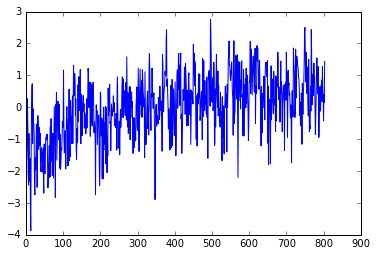

In [51]:
plt.plot(pc1)

In [52]:
eof1.shape

(1, 29, 144)

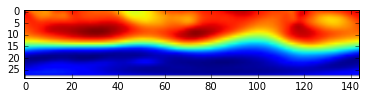

In [53]:
plt.imshow(eof1.squeeze())

In [54]:
from matplotlib.mlab import detrend_linear

In [57]:
dpc1 = detrend_linear(pc1.squeeze())

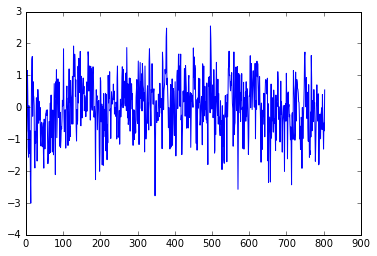

In [58]:
plt.plot(dpc1)

In [61]:
time = hgt_700_anoms.time.to_index()

In [62]:
import pandas as pd

In [68]:
SAM = pd.DataFrame(dpc1, index=time, columns=['SAM'])

In [71]:
SAM.to_csv('../data/SAM_index_1948_2014_1981_2010_Clim.csv')